# TD/TP 1 : régression linéaire simple et un peu de multiple
UE Modèle linéraire  
Auteur : moi  
Aix-Marseille Université / Faculté des Sciences

:::{.callout-warning}
## Attention
Pensez à mettre votre nom dans l'entête du document.
:::


In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

## Exercice 1 : quelques résultats théoriques

On se place dans le cadre de la régression linéaire simple. Autrement dit, pour un individu $(X, Y)$ de la population, on suppose que
$$
Y = \beta_0 + \beta_1 X + \varepsilon,\quad \text{avec }\sigma^2 = \text{Var}(\varepsilon),
$$
où $X$ et $\epsilon$ sont indépendants, et $\mathbb{E}(\varepsilon) = 0$.

**1.** Soit $x\in\mathbb R$. Calculer $\mathbb{E}(Y|X=x)$, la moyenne de $Y$ sur la sous-population où $X=x$.

On se donne maintenant un échantillon de taille $n$, modélisé par des paires indépendantes $(X_i, Y_i)$, $i=1,\ldots, n$. Et on considère les estimateurs définis par
$$
\hat\beta_1 = \frac{\sum_i(Y_i-\bar Y)(X_i-\bar X)}{\sum_i(X_i-\bar X)^2}, \quad
\hat\beta_0 = \bar Y - \hat\beta_1\bar X
$$

**2.** Que vaut $\bar Y$ en fonction de $\beta_0$, $\beta_1$, $\bar X$ et $\bar \varepsilon$ ? Et que vaut $\sum_i \bar\varepsilon(X_i-\bar X)$ ? En déduire que
$$
\hat\beta_1 = \beta_1 + \sum_i \frac{(X_i-\bar X)}{S_X^2} \varepsilon_i, \quad
\text{où } S_X^2 = \sum_j(X_j-\bar X)^2.
$$

**3.** Soient $x_1,\ldots, x_n\in\mathbb R$. En déduire que
$$
\text{Var}\Big(\hat\beta_1 \Big|X_{1:n}=x_{1:n}\Big) = \sigma^2 \Big/ \sum_i(x_i-\bar x)^2
$$

**4.** Avec la loi des grands nombres, montrer que, presque sûrement, l'équivalence suivante est vraie
$$
S_X^2 \sim_{n\to\infty} n \text{Var}(X).
$$

**5.** En déduire l'équivalent presque sûr que
$$
\text{Var}\Big(\hat\beta_1 \Big|X_{1:n}\Big) = \frac{\sigma^2}{S_X^2}
\sim_{n\to\infty} 
\frac 1n \frac{\sigma^2}{\text{Var}(X)}
$$
Par quel facteur environ faut-il multiplier la taille de l'échantillon pour que l'erreur standard soit divisée par $10$ ?

Maintenant, on considère le modèle de régression linéaire simple gaussien, où pour tout $x\in\mathbb R$,
$$
\Big[Y\Big| X=x \Big]\sim \mathcal{N}\Big(\beta_0+\beta_1 x; \sigma^2\Big).
$$

**6.** Montrer que, sur l'échantillon introduit précédemment, la log-vraisemblance, conditionnellement à $X_{1:n}=x_{1:n}$ est donnée par
$$
\ell(\beta_0,\beta_1,\sigma^2) = -\frac{1}{2\sigma^2} \sum_{i=1}^n (Y_i-\beta_0 - \beta_1 x_i)^2 
-\frac n2 \log (\sigma^2) + \text{constante}.
$$

**7.** Trouver la solution explicite du maximum de vraisemblance.



## Exercice 2 : mise en œuvre de la régression

Aux élections présidentielles américaines, l'économique influence le résultat de l'élection. On dit souvent que le parti au pouvoir le conserve si l'économique se porte bien. On va donc considérer un jeu de données à cinq variables :

- `year` : l'année de l'élection,
- `growth` : la croissance moyenne du revenu des américains (en $\%$),
- `vote` : part du parti sortant dans le vote aux élections présidentielles (en $\%$),
- `inc_party_candidate` : nom du candidat du parti sortant,
- `other_candidate` : nom du candidat d'opposition.

On peut charger les données ainsi :


In [10]:
hibbs = pd.read_csv('tp1/hibbs.dat', sep=" ")

**1.** Quelle est la variable à expliquer ici ? Et la covariable ? Et la "population statistique" ? Y a-t-il une chance que le modèle puisse se prolonger pour faire des projections au delà des valeurs observées de `growth` ?

Identification de la variable à expliquer, de la covariable et de la population statistique :

- Variable à expliquer : `vote`, qui représente la part du vote en faveur du parti sortant.
- Covariable : `growth`, qui correspond à la croissance moyenne du revenu des Américains en pourcentage.
- Population statistique : toutes les élections présidentielles américaines durant lesquelles les données pour `growth` et `vote` ont été collectées, donc l'ensemble des élections passées présentes dans les données.

Prolongation du modèle au-delà des valeurs observées de `growth` : 



**2.** L'ajustement se fait à la commande ci-dessous.


In [9]:
regression = smf.ols('vote ~ growth', data=hibbs).fit()
resume_regression = regression.summary()
print(regression.scale)
print(resume_regression)

14.162333878159503
                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     19.32
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           0.000610
Time:                        10:35:42   Log-Likelihood:                -42.839
No. Observations:                  16   AIC:                             89.68
Df Residuals:                      14   BIC:                             91.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2476      1.622 

/home/administrateur/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


Comment s'interprète $\beta_0$ et $\beta_1$ ici ? Les valeurs estimées sont-elles plausibles ? Et comment s'interprète $\sigma$ ici.

Quelle est la part de variabilité de $Y$ expliquée par la covariable ?


**3.** Pour les $\beta_i$, on peut obtenir des intervalles de confiance au niveau $95\%$ avec la commande ci-dessous.

In [11]:
intervalle_confiance = regression.conf_int(alpha=0.05)
intervalle_confiance.columns = ['2.5%', '97.5%']
intervalle_confiance

,2.5%,97.5%
Intercept,42.768951,49.726345
growth,1.567169,4.553887


Comment peut-on interpréter le fait que $50\%$ ne soit pas dans l'intervalle de confiance de $\beta_0$ ?

**4.** Quelles hypothèses doit-on vérifier sur $\varepsilon$ pour utiliser ces intervalles de confiance ? Et faire des intervalles de prédiction ?

Faites ces vérifications graphiquement en commantant les graphiques ci-dessous. Quel graphique est inutile ?

In [ ]:
residus_student = regression.get_influence().resid_studentized_internal
predictions = regression.fittedvalues

from scipy.stats import norm

# Histogram of residuals with normal curve
plt.figure(figsize=(10, 6))
plt.hist(residus_student, bins=5, density=True, alpha=0.6, color='blue', edgecolor='black')
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1), 'r', label="Loi normale")
plt.xlabel('Résidus studentisés')
plt.ylabel('Densité')
plt.legend()
plt.show()

# QQ plot
sm.qqplot(residus_student, line ='45')
plt.title('QQ Plot des résidus studentisés')
plt.show()

# Residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residus_student, edgecolor='k', facecolor='blue', alpha=0.7)
plt.axhline(0, color='black')
plt.axhline(-1.96, color='red', linestyle='--')
plt.axhline(1.96, color='red', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus studentisés')
plt.show()


**5.** On admet que les intervalles de confiance et de prédiction sont utilisables. [Vus les résulats sur les graphiques, leurs bornes inférieures sont sans doute un peu trop élevées.] Au moment de l'élection opposant Hillary Clinton et Donald Trump, le parti sortant était celui d'Hillary Clinton (démocrate). Et la variable `growth` était à environ $2\%$. Quel intervalle doit-on utiliser si l'on s'intéresse au résultat de cette élection ?


In [ ]:
nouvelle_croissance = pd.DataFrame({'growth': [2.0]})
# Confidence interval prediction
conf_pred = regression.get_prediction(nouvelle_croissance).conf_int(alpha=0.05)

# Prediction interval
pred_interval = regression.get_prediction(nouvelle_croissance).summary_frame(alpha=0.05)[['obs_ci_lower', 'obs_ci_upper']]

print("Intervalle de confiance : \n", conf_pred)
print("Intervalle de prédiction : \n", pred_interval)


**6.** Calculer les carrés des demi-longueurs des intervalles de confiance et de prédiction. Que vaut la différence entre ces deux carrés ? Justifier la réponse.

In [ ]:
from scipy.stats import t

conf_lower, conf_upper = conf_pred[0]
pred_lower, pred_upper = pred_interval.iloc[0]
carre1 = ((conf_upper - conf_lower)/2)**2
carre2 = ((pred_upper - pred_lower)/2)**2
print("Carré de la demi-longueur de l'intervalle de confiance : ", carre1)
print("Carré de la demi-longueur de l'intervalle de prédiction : ", carre2)
print("Différence entre les deux carrés : ", carre2 - carre1)
np.sqrt(carre2 - carre1)/t.ppf(0.975, regression.df_resid)

## Exercice 3 : Des modèles plus complexes

Voici le jeu de données issu d'une étude reliant le QI d'enfants à leur mère aux USA.

In [12]:
kidiq = pd.read_csv('tp1/kidiq.csv', sep=",")
kidiq['mom_hs_num'] = kidiq['mom_hs']
kidiq['mom_hs']=kidiq['mom_hs'].astype('category')
kidiq['mom_work'] = kidiq['mom_work'].astype('category')

Il est composé de 5 variables :

- `kid_score` : le QI de l'enfant,
- `mom_hs` : une variable catégorielle qui indique si la mère a obtenu son diplôme à l'issu des études secondaires (*high school*), égale à $1$ si c'est le cas, $0$ sinon,
- `mon_hs_num` : la même variable, au format numérique,
- `mom_iq` : le QI de la mère,
- `mom_work` : un indicateur catégoriel sur l'emploi de la mère,
- `mom_age` : l'âge de la mère.

On s'intéresse à des modèles où l'on cherche à prédire le QI de l'enfant.

**1.** On s'intéresse à prédire `kid_score` avec `mom_hs`.

Le code ci-dessous calcule les moyennes  et écarts-types  de `kid_score` au sein des deux sous-échantillons caractérisées par la valeur de `mom_hs`.

In [13]:
kidiq.groupby('mom_hs')['kid_score'].agg(['count', 'mean', 'std'])

/tmp/ipykernel_5199/1380012072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kidiq.groupby('mom_hs')['kid_score'].agg(['count', 'mean', 'std'])


,count,mean,std
mom_hs,,,
0,93,77.548387,22.573800
1,341,89.319648,19.049483


Voici un premier modèle :

In [14]:
reg1 = smf.ols('kid_score ~ mom_hs', data=kidiq).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           5.96e-07
Time:                        11:46:44   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      77.5484      2.059     37.670      

Quelle différence y a-t-il avec ce modèle ?

In [15]:
reg1bis = smf.ols('kid_score ~ mom_hs_num', data=kidiq).fit()
print(reg1bis.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           5.96e-07
Time:                        11:46:55   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.5484      2.059     37.670      0.0

Comment s'interprète $\beta_1$ ici~? Quelle est la part de variance de $Y$ expliquée par `mom_hs` ?

**2.** On essaie maintenant de faire la même chose avec `mom_work` comme covariable.

Les moyennes et écarts-types au sein des 4 sous-échantillons sont :

In [16]:
kidiq.groupby('mom_work')['kid_score'].agg(['count', 'mean', 'std'])

/tmp/ipykernel_5199/2329896594.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kidiq.groupby('mom_work')['kid_score'].agg(['count', 'mean', 'std'])


,count,mean,std
mom_work,,,
1,77,82.000000,21.704353
2,96,85.854167,21.722644
3,56,93.500000,16.339578
4,205,87.209756,19.884961


In [20]:
reg1ter = smf.ols('kid_score ~ mom_work', data=kidiq).fit()
print(reg1ter.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.590
Date:                Fri, 25 Oct 2024   Prob (F-statistic):             0.0138
Time:                        11:57:22   Log-Likelihood:                -1918.9
No. Observations:                 434   AIC:                             3846.
Df Residuals:                     430   BIC:                             3862.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        82.0000      2.305     35.568


Comment s'interprètent les $\beta$ ici ?

**3.** On veut maintenant prédire $Y$ à l'aide de `mom_iq`. Faire l'analyse complète avec un modèle de régression linéaire simple et étude des hypothèses.

**4.** Montrer que le modèle de régression linéaire simple s'écrit aussi 

$$
Y - \mathbb E(Y) = \beta_1 \Big(X - \mathbb E(X)\Big) + \varepsilon.
$$

Donner un intervalle de confiance pour $\beta_1$ au niveau $95\%$. Interpréter le fait que l'intervalle de confiance est inclus dans $[0;1[$ comme un phénomène de régression vers la moyenne.

**5.** On s'intéresse maintenant à prédire $Y$ avec `mom_iq` et `mom_hs` conjointement. On notera que ces deux variables sont liées :

<Axes: title={'center': 'mom_iq'}, xlabel='mom_hs'>

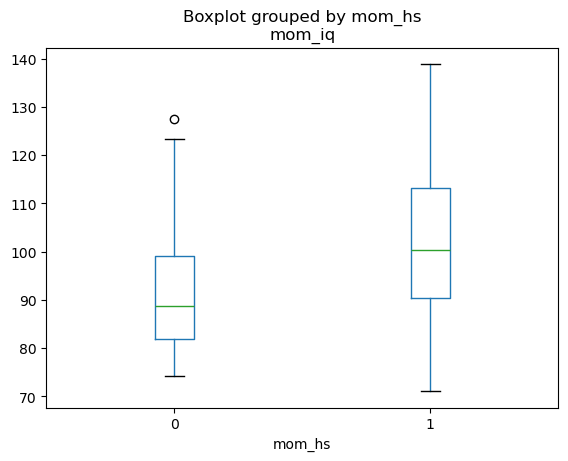

In [17]:
kidiq.boxplot(column='mom_iq', by='mom_hs', grid=False)


Voici deux modèles de régression linéaire qui utilisent conjointement ces deux variables pour prédire $Y$ :

In [18]:
reg2 = smf.ols('kid_score ~ mom_hs + mom_iq', data=kidiq).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.79e-23
Time:                        11:57:07   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      25.7315      5.875      4.380      

In [19]:
reg3 = smf.ols('kid_score ~ mom_hs * mom_iq', data=kidiq).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.07e-24
Time:                        11:57:13   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -11.4820     13


Quelles sont les équations de ces modèles ? Comment se lisent ses équations dans les deux sous-groupes définis par la variable `mom_hs` ?

Quelles sont les parts de variances expliquées par les deux modélisations ?

Comparer l'interprétation des effets $\beta$ en facteur de la covariable `mom_iq` dans les deux modèles ci-dessus et dans le modèle de la question 3.

Voit-on encore des phénomènes de régression vers la moyenne pour l'une ou l'autre des modélisation, dans l'un ou l'autre des sous-groupes ?